# Setup

In [2]:
import Glob
import DataFrames
import CSV
import JSON

## Loading Data

In [3]:
data_directory = "./experiments/participants";

In [4]:
filenames_session = Glob.glob(data_directory * "/p*_[0-4]_*.csv" ) |> sort;
filenames_config = Glob.glob(data_directory * "/p*_[0-4]_*.json") |> sort;

In [5]:
data_session = [CSV.read(filename) for filename in filenames_session];
data_config = [JSON.parsefile(filename) for filename in filenames_config];

## Data Merging

In [6]:
for (i, session) in enumerate(data_session)
    
    participant_string = data_config[i]["details"]["participant"]
    (participant, block) = split(participant_string, "_")
    
    session[!, :condition] .= data_config[i]["CONDITION"]
    session[!, :participant] .= join(["P", lpad(parse(Int64, participant[2:end]), 2, '0')])
    #session[!, :participant] .= participant
    session[!, :block] .= parse(Int64, block)
    session[!, :correct] = session[!, :digit] .== session[!, :keypress]
    
end

In [7]:
data = vcat(data_session...)

,trial,cue,digit,keypress,cuetime,trialtime,sessiontime,condition,participant
,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,String
1,0,0,8,0,3.56245,6.51641,7.78259,1,P10
2,0,1,2,2,3.10118,9.62042,10.8866,1,P10
3,0,2,9,1,3.72535,13.3485,14.6146,1,P10
4,0,3,2,3,3.59716,16.9484,18.2146,1,P10
5,0,4,8,0,2.62138,19.5725,20.8387,1,P10
6,0,5,1,7,3.04535,22.6205,23.8867,1,P10
7,0,6,4,1,2.65325,25.2764,26.5426,1,P10
8,0,7,0,0,3.12539,28.4044,29.6706,1,P10
9,0,8,5,2,4.99732,33.4044,34.6706,1,P10


In [49]:
num_total_cues = DataFrames.by(data, [:participant], :condition => sum, sort=true)

,participant,condition_sum
,String,Int64
1,P01,500
2,P02,500
3,P03,500
4,P04,500
5,P05,400
6,P06,480
7,P07,480
8,P08,240
9,P09,480


# Analysis

In [8]:
using StatsPlots
using Statistics

In [9]:
gr()

Plots.GRBackend()

In [10]:
conditions = Dict(
    0 => "Direct Processor",
    1 => "Trained Processor"
)

Dict{Int64,String} with 2 entries:
  0 => "Direct Processor"
  1 => "Trained Processor"

## Mean Accuracy

In [11]:
mean_accuracy = DataFrames.by(
    data, 
    [:participant, :condition], 
    :correct => mean, 
    sort=true
)

,participant,condition,correct_mean
,String,Int64,Float64
1,P01,0,0.676
2,P01,1,0.936
3,P02,0,0.8
4,P02,1,0.638
5,P03,0,0.568
6,P03,1,0.936
7,P04,0,0.514
8,P04,1,0.78
9,P05,0,0.495


In [62]:
agg_mean = DataFrames.by(
    mean_accuracy,
    :condition,
    :correct_mean => mean,
    :correct_mean => x -> std(x) / sqrt(11),
    sort=true
)

,condition,correct_mean_mean,correct_mean_function
,Int64,Float64,Float64
1,0,0.598189,0.0374556
2,1,0.756818,0.0416241


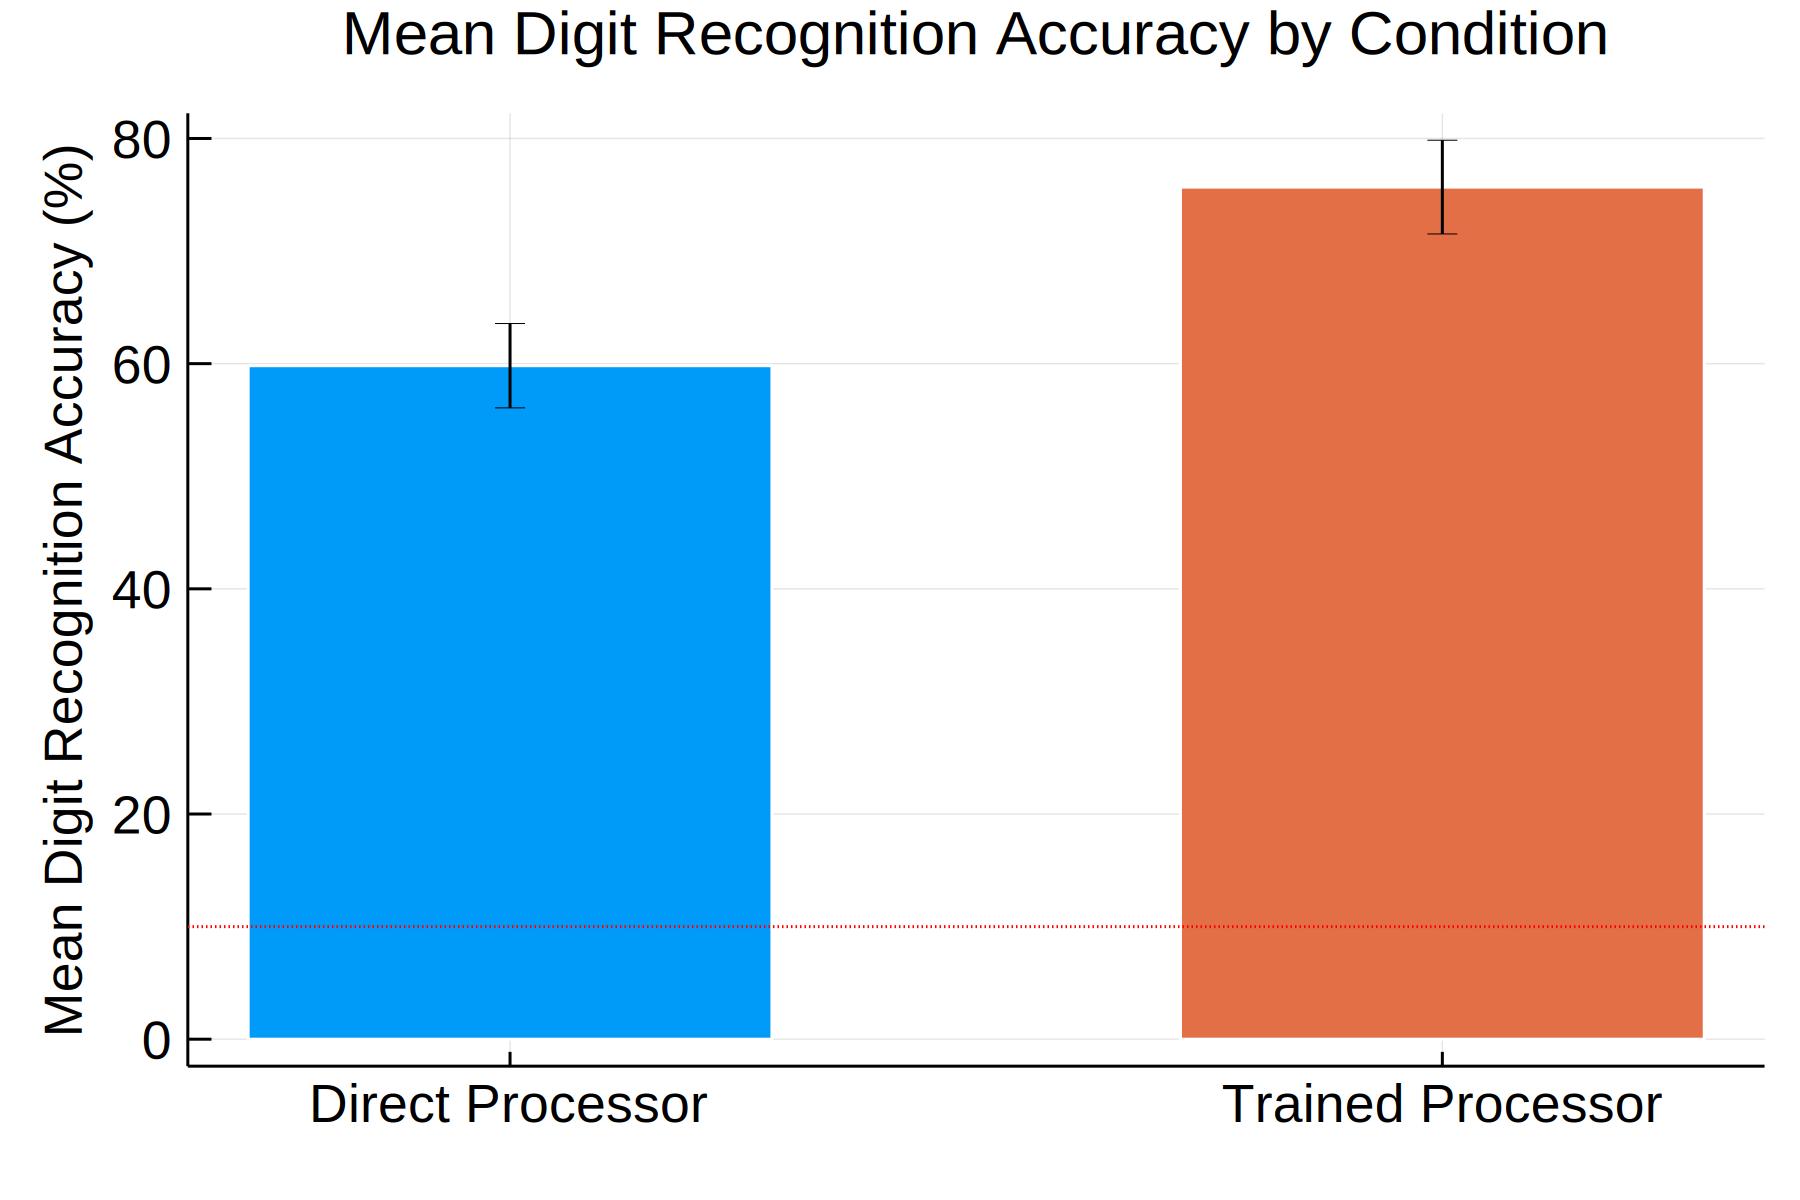

In [63]:
bar(
    map(x -> conditions[x], agg_mean[!, :condition]),
    agg_mean[!, :correct_mean_mean] * 100,
    yerr=agg_mean[!, :correct_mean_function] * 100,
    linecolor=:white,
    msc=:black,
    group=agg_mean[!, :condition],
    title="Mean Digit Recognition Accuracy by Condition",
    ylabel="Mean Digit Recognition Accuracy (%)",
    legend=false,
    tickfont=font(12),
    guidefont=font(12),
    titlefont=font(14),
    dpi=300
)
hline!(
    [10],
    linecolor=:red,
    linestyle=:dot,
)

In [64]:
savefig("../thesis/images/results_mean_accuracy_overall.png")

In [15]:
mean_accuracy

,participant,condition,correct_mean
,String,Int64,Float64
1,P01,0,0.676
2,P01,1,0.936
3,P02,0,0.8
4,P02,1,0.638
5,P03,0,0.568
6,P03,1,0.936
7,P04,0,0.514
8,P04,1,0.78
9,P05,0,0.495


In [16]:
mean_accuracy[!, :condition_string] = collect(map(x -> conditions[x], mean_accuracy[!, :condition] ))

22-element Array{String,1}:
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"

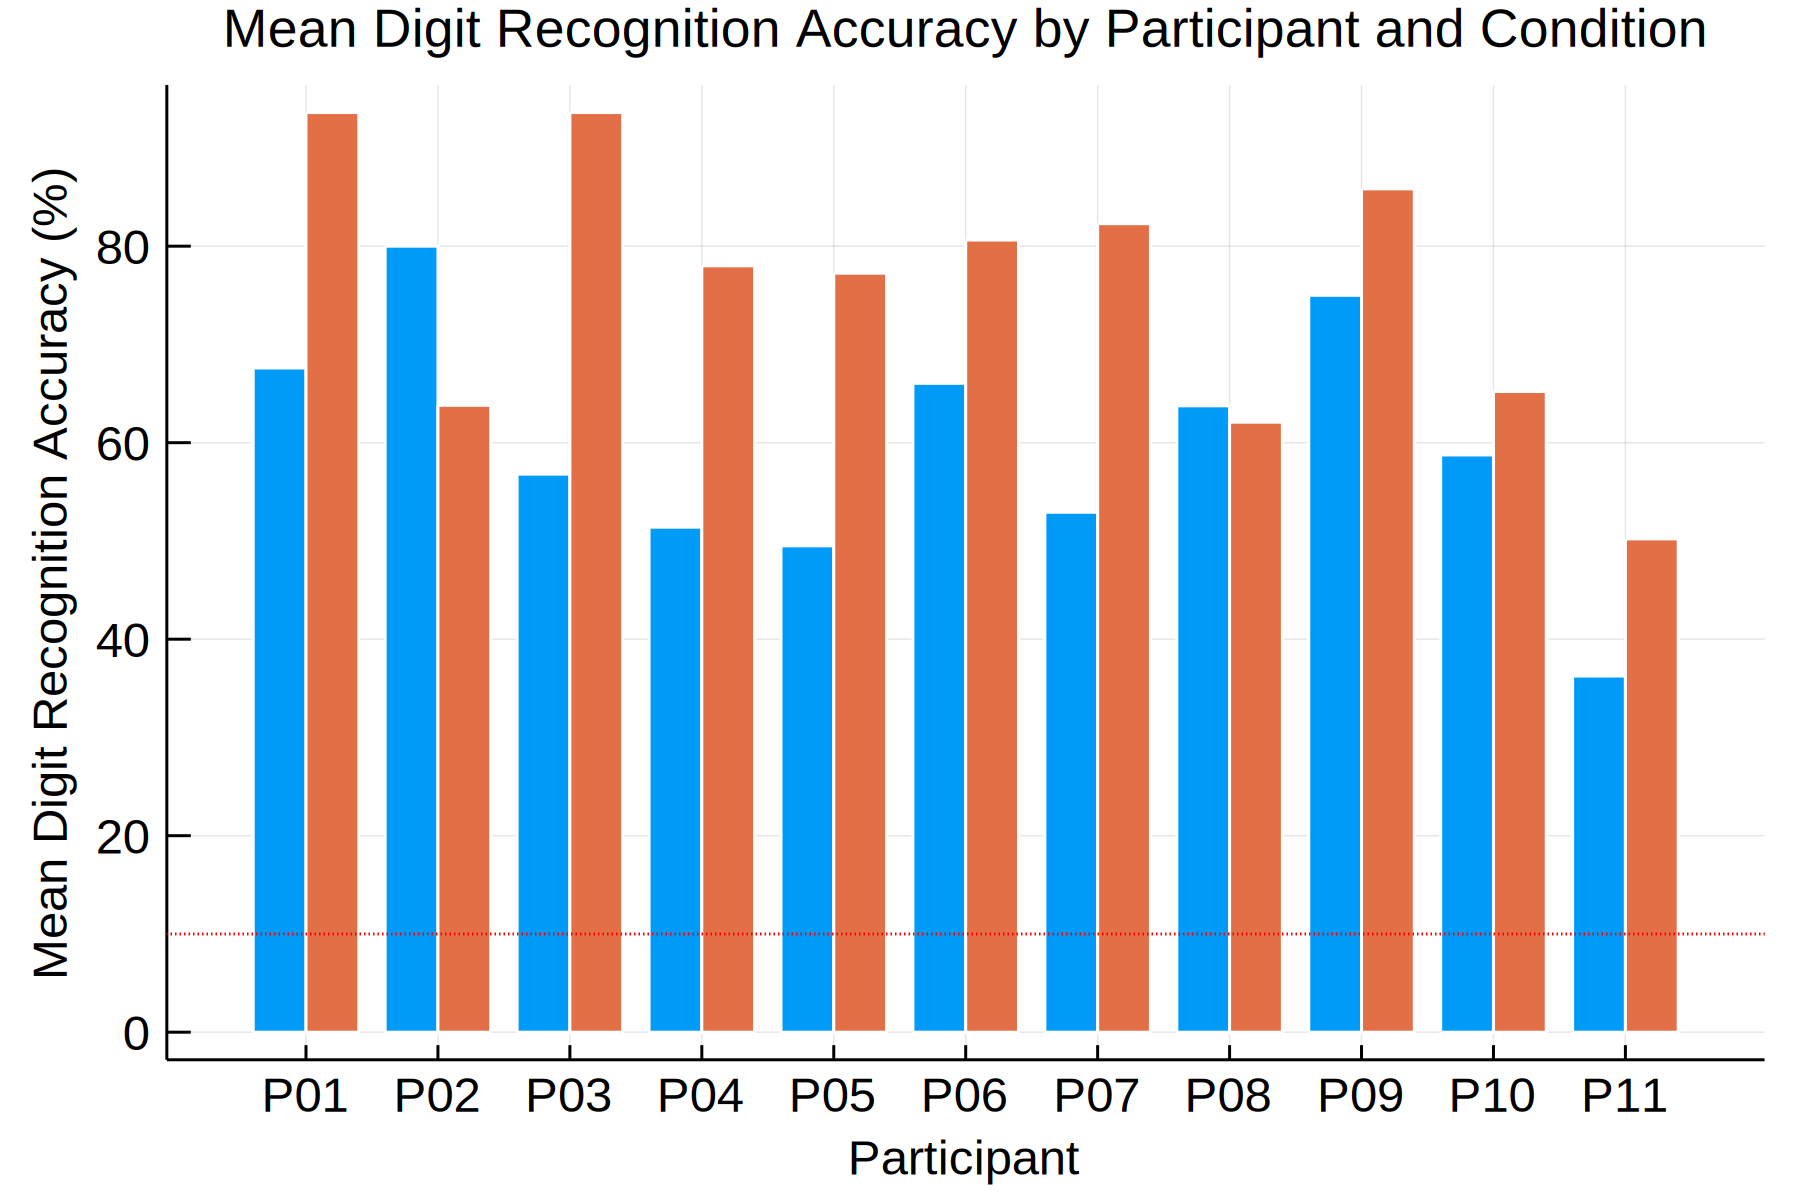

In [17]:
groupedbar(
    #map(x -> conditions[x], mean_accuracy[!, :condition]),
    map(x -> x, mean_accuracy[!, :participant]),
    mean_accuracy[!, :correct_mean] * 100,
    #group=mean_accuracy[!, :participant],
    group=mean_accuracy[!, :condition_string],
    linecolor=:white,
    title="Mean Digit Recognition Accuracy by Participant and Condition",
    ylabel="Mean Digit Recognition Accuracy (%)",
    xlabel="Participant",
    legend=:none,
    guidefont=font(11),
    tickfont=font(11),
    titlefont=font(12),
    dpi=300,
)
hline!(
    [10],
    linecolor=:red,
    linestyle=:dot,
    label="chance",
)

In [18]:
savefig("../thesis/images/results_mean_accuracy_by_participant.png")

## Mean Time Taken

In [19]:
mean_time_taken = DataFrames.by(
    data, 
    [:participant, :condition], 
    :cuetime => mean, 
    :cuetime => std,
    sort=true
)

,participant,condition,cuetime_mean,cuetime_std
,String,Int64,Float64,Float64
1,P01,0,3.53024,3.10045
2,P01,1,2.06568,2.10106
3,P02,0,2.2523,1.22367
4,P02,1,2.24258,1.38742
5,P03,0,3.22271,2.22023
6,P03,1,1.74843,1.84118
7,P04,0,3.06224,1.45364
8,P04,1,2.44975,1.49707
9,P05,0,6.20503,4.52432


In [20]:
agg_time_taken = DataFrames.by(
    mean_time_taken,
    :condition,
    :cuetime_mean => mean,
    :cuetime_mean => std,
    sort=true
)

,condition,cuetime_mean_mean,cuetime_mean_std
,Int64,Float64,Float64
1,0,3.34805,1.07756
2,1,2.60443,0.682641


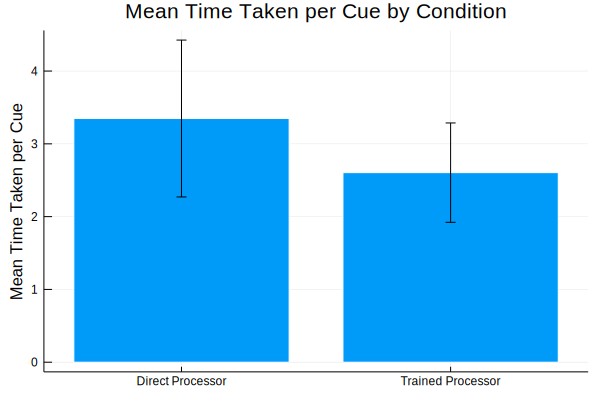

In [21]:
bar(
    map(x -> conditions[x], agg_time_taken[!, :condition]),
    agg_time_taken[!, :cuetime_mean_mean],
    yerr=agg_time_taken[!, :cuetime_mean_std],
    linecolor=:white,
    msc=:black,
    title="Mean Time Taken per Cue by Condition",
    ylabel="Mean Time Taken per Cue",
    legend=false,
)

In [22]:
mean_time_taken[!, :condition_string] = collect(map(x -> conditions[x], mean_time_taken[!, :condition] ))

22-element Array{String,1}:
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"
 "Direct Processor" 
 "Trained Processor"

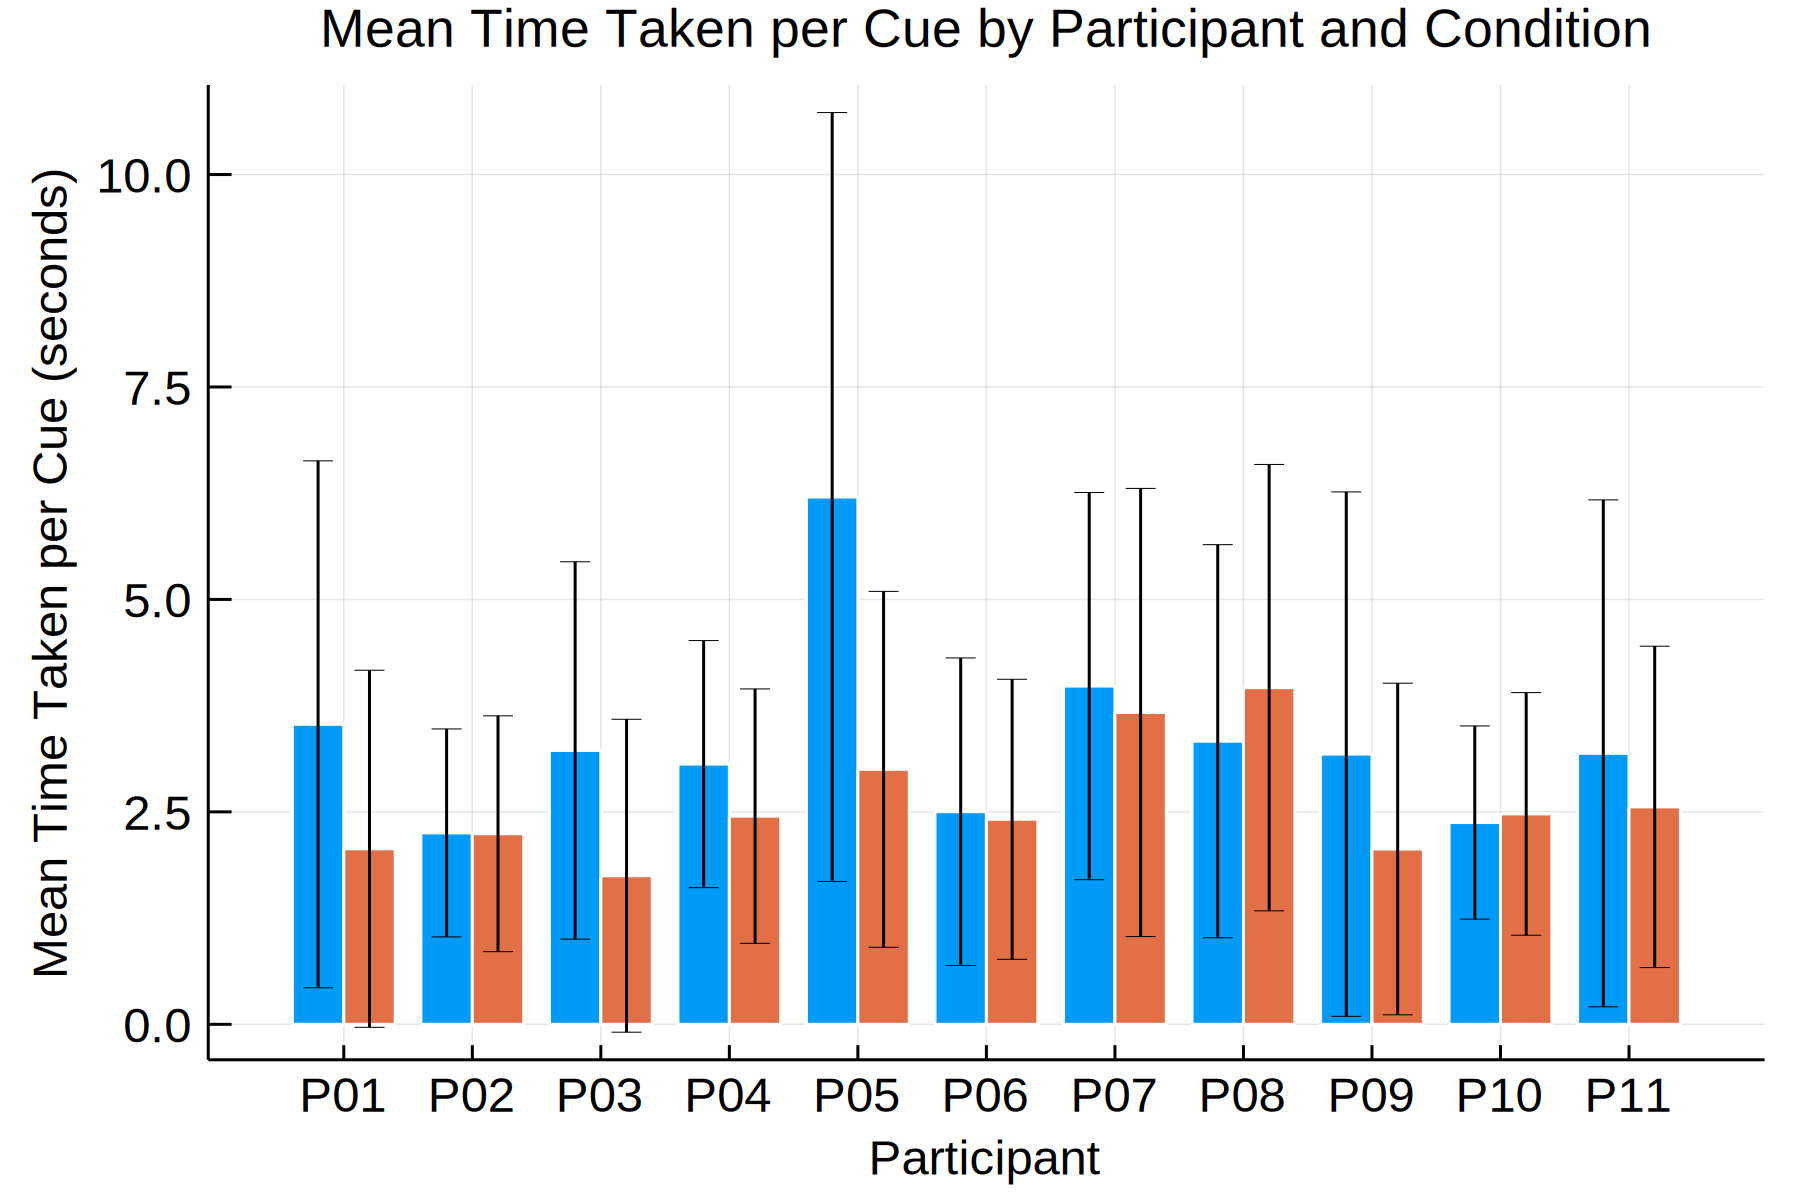

In [23]:
groupedbar(
    map(x -> x, mean_time_taken[!, :participant]),
    mean_time_taken[!, :cuetime_mean],
    group=mean_time_taken[!, :condition_string],
    yerr=mean_time_taken[!, :cuetime_std],
    linecolor=:white,
    title="Mean Time Taken per Cue by Participant and Condition",
    ylabel="Mean Time Taken per Cue (seconds)",
    xlabel="Participant",
    legend=:none,
    msc=:black,
    guidefont=font(11),
    tickfont=font(11),
    titlefont=font(12),
    dpi=300,
)

In [24]:
savefig("../thesis/images/response_time_by_participant.png")

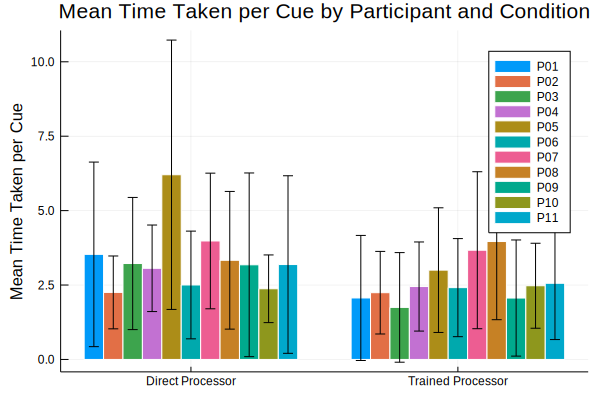

In [25]:
groupedbar(
    map(x -> conditions[x], mean_time_taken[!, :condition]),
    mean_time_taken[!, :cuetime_mean],
    yerr=mean_time_taken[!, :cuetime_std],
    group=mean_time_taken[!, :participant],
    msc=:black,
    linecolor=:white,
    title="Mean Time Taken per Cue by Participant and Condition",
    ylabel="Mean Time Taken per Cue",
)

## Confusion Matrix

In [26]:
using PyCall

In [27]:
metrics = pyimport("sklearn.metrics")

PyObject <module 'sklearn.metrics' from 'C:\\Users\\wjmn\\.julia\\conda\\3\\lib\\site-packages\\sklearn\\metrics\\__init__.py'>

In [28]:
participants_set = sort(collect(Set(data[!, :participant])));
conditions_set = sort(collect(Set(data[!, :condition])));

In [29]:
subsets = [
    data[ 
        (data[!, :participant] .== participant) .&
        (data[!, :condition] .== condition)
    , :] for participant in participants_set for condition in conditions_set
];

In [30]:
confusions = [
    metrics.confusion_matrix(d[!, :digit], d[!, :keypress])
    for d in subsets
]

22-element Array{Array{Int64,2},1}:
 [44 4 … 0 0; 0 35 … 1 0; … ; 1 1 … 50 1; 1 0 … 2 29]  
 [41 0 … 0 2; 1 44 … 0 0; … ; 0 0 … 49 1; 0 0 … 0 36]  
 [39 0 … 1 5; 0 51 … 0 0; … ; 0 0 … 51 1; 7 0 … 0 30]  
 [20 0 … 0 0; 0 24 … 0 0; … ; 0 0 … 41 1; 0 0 … 0 49]  
 [26 2 … 0 11; 0 46 … 0 1; … ; 1 0 … 18 2; 0 0 … 2 1]  
 [50 0 … 1 0; 0 41 … 0 0; … ; 0 0 … 45 0; 1 0 … 0 47]  
 [18 0 … 8 6; 3 36 … 0 1; … ; 3 0 … 23 7; 4 0 … 6 9]   
 [44 0 … 0 0; 0 32 … 0 0; … ; 0 1 … 35 0; 1 0 … 1 40]  
 [9 0 … 2 8; 0 31 … 0 0; … ; 2 0 … 7 16; 1 0 … 7 27]   
 [16 0 … 2 0; 2 42 … 0 2; … ; 0 3 … 27 1; 2 1 … 1 39]  
 [16 0 … 4 7; 0 52 … 1 0; … ; 1 0 … 28 3; 4 0 … 5 22]  
 [46 0 … 1 0; 0 22 … 2 3; … ; 0 1 … 38 1; 1 2 … 2 41]  
 [14 0 … 2 18; 1 26 … 0 0; … ; 4 1 … 24 1; 10 1 … 2 25]
 [33 2 … 0 0; 1 43 … 0 0; … ; 0 1 … 46 3; 1 2 … 0 52]  
 [10 0 … 2 10; 0 23 … 0 0; … ; 0 0 … 7 1; 2 0 … 5 10]  
 [8 0 … 2 0; 0 19 … 1 0; … ; 1 2 … 0 0; 0 0 … 0 22]    
 [24 0 … 2 13; 0 45 … 0 0; … ; 1 0 … 18 11; 8 0 … 2 16]
 [45 0 … 1 4

In [31]:
heatmap_labels = [
    join([participant, ": ", conditions[condition]])
    for participant in participants_set for condition in conditions_set
]

22-element Array{String,1}:
 "P01: Direct Processor" 
 "P01: Trained Processor"
 "P02: Direct Processor" 
 "P02: Trained Processor"
 "P03: Direct Processor" 
 "P03: Trained Processor"
 "P04: Direct Processor" 
 "P04: Trained Processor"
 "P05: Direct Processor" 
 "P05: Trained Processor"
 "P06: Direct Processor" 
 "P06: Trained Processor"
 "P07: Direct Processor" 
 "P07: Trained Processor"
 "P08: Direct Processor" 
 "P08: Trained Processor"
 "P09: Direct Processor" 
 "P09: Trained Processor"
 "P10: Direct Processor" 
 "P10: Trained Processor"
 "P11: Direct Processor" 
 "P11: Trained Processor"

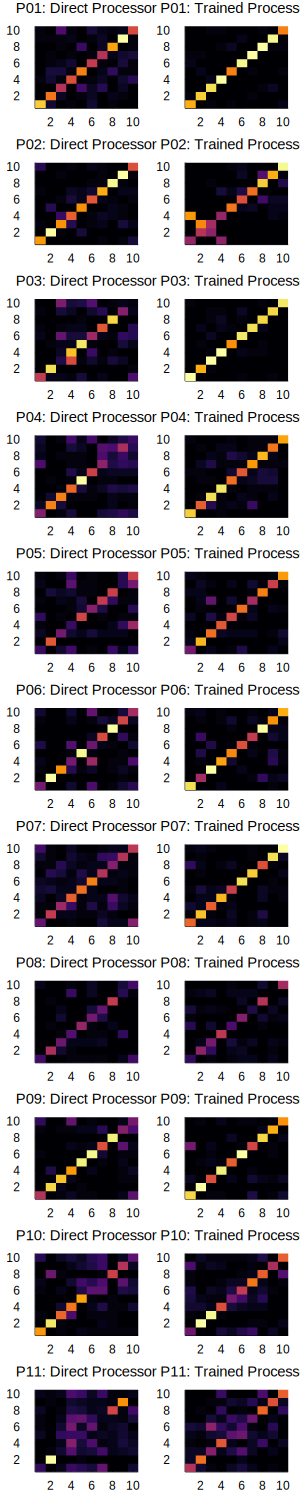

In [32]:
layout = @layout[a b; c d; e f; g h; i j; k l; m n; o p; q r; s t ; u v]
heatmaps = [ 
    heatmap(
        confusion,
        size=(500,500),
        clims=(0, 50),
        colorbar=false,
        title=label,
        titlefontsize=10
    )
    for (confusion, label) in zip(confusions, heatmap_labels)
]
plot(heatmaps..., layout=layout, size=(300, 1500))

## Learning Curve 

In [33]:
function moving(column::Array{<:Number}; window=20)
    width = window ÷ 2
    moving = []
    for i in 1:(length(column))
        if i < width
            push!(moving, NaN)
        elseif i > (length(column) - width)
            push!(moving, NaN)
        else
            average = sum(column[(i-width+1):i+width]) / window
            push!(moving, average)
        end
    end
    moving
end

moving (generic function with 1 method)

In [34]:
window_size = 50

50

In [35]:
for subset in subsets
    subset[!, :moving_average] .= moving(Int.(subset[!, :correct]), window=window_size)
end

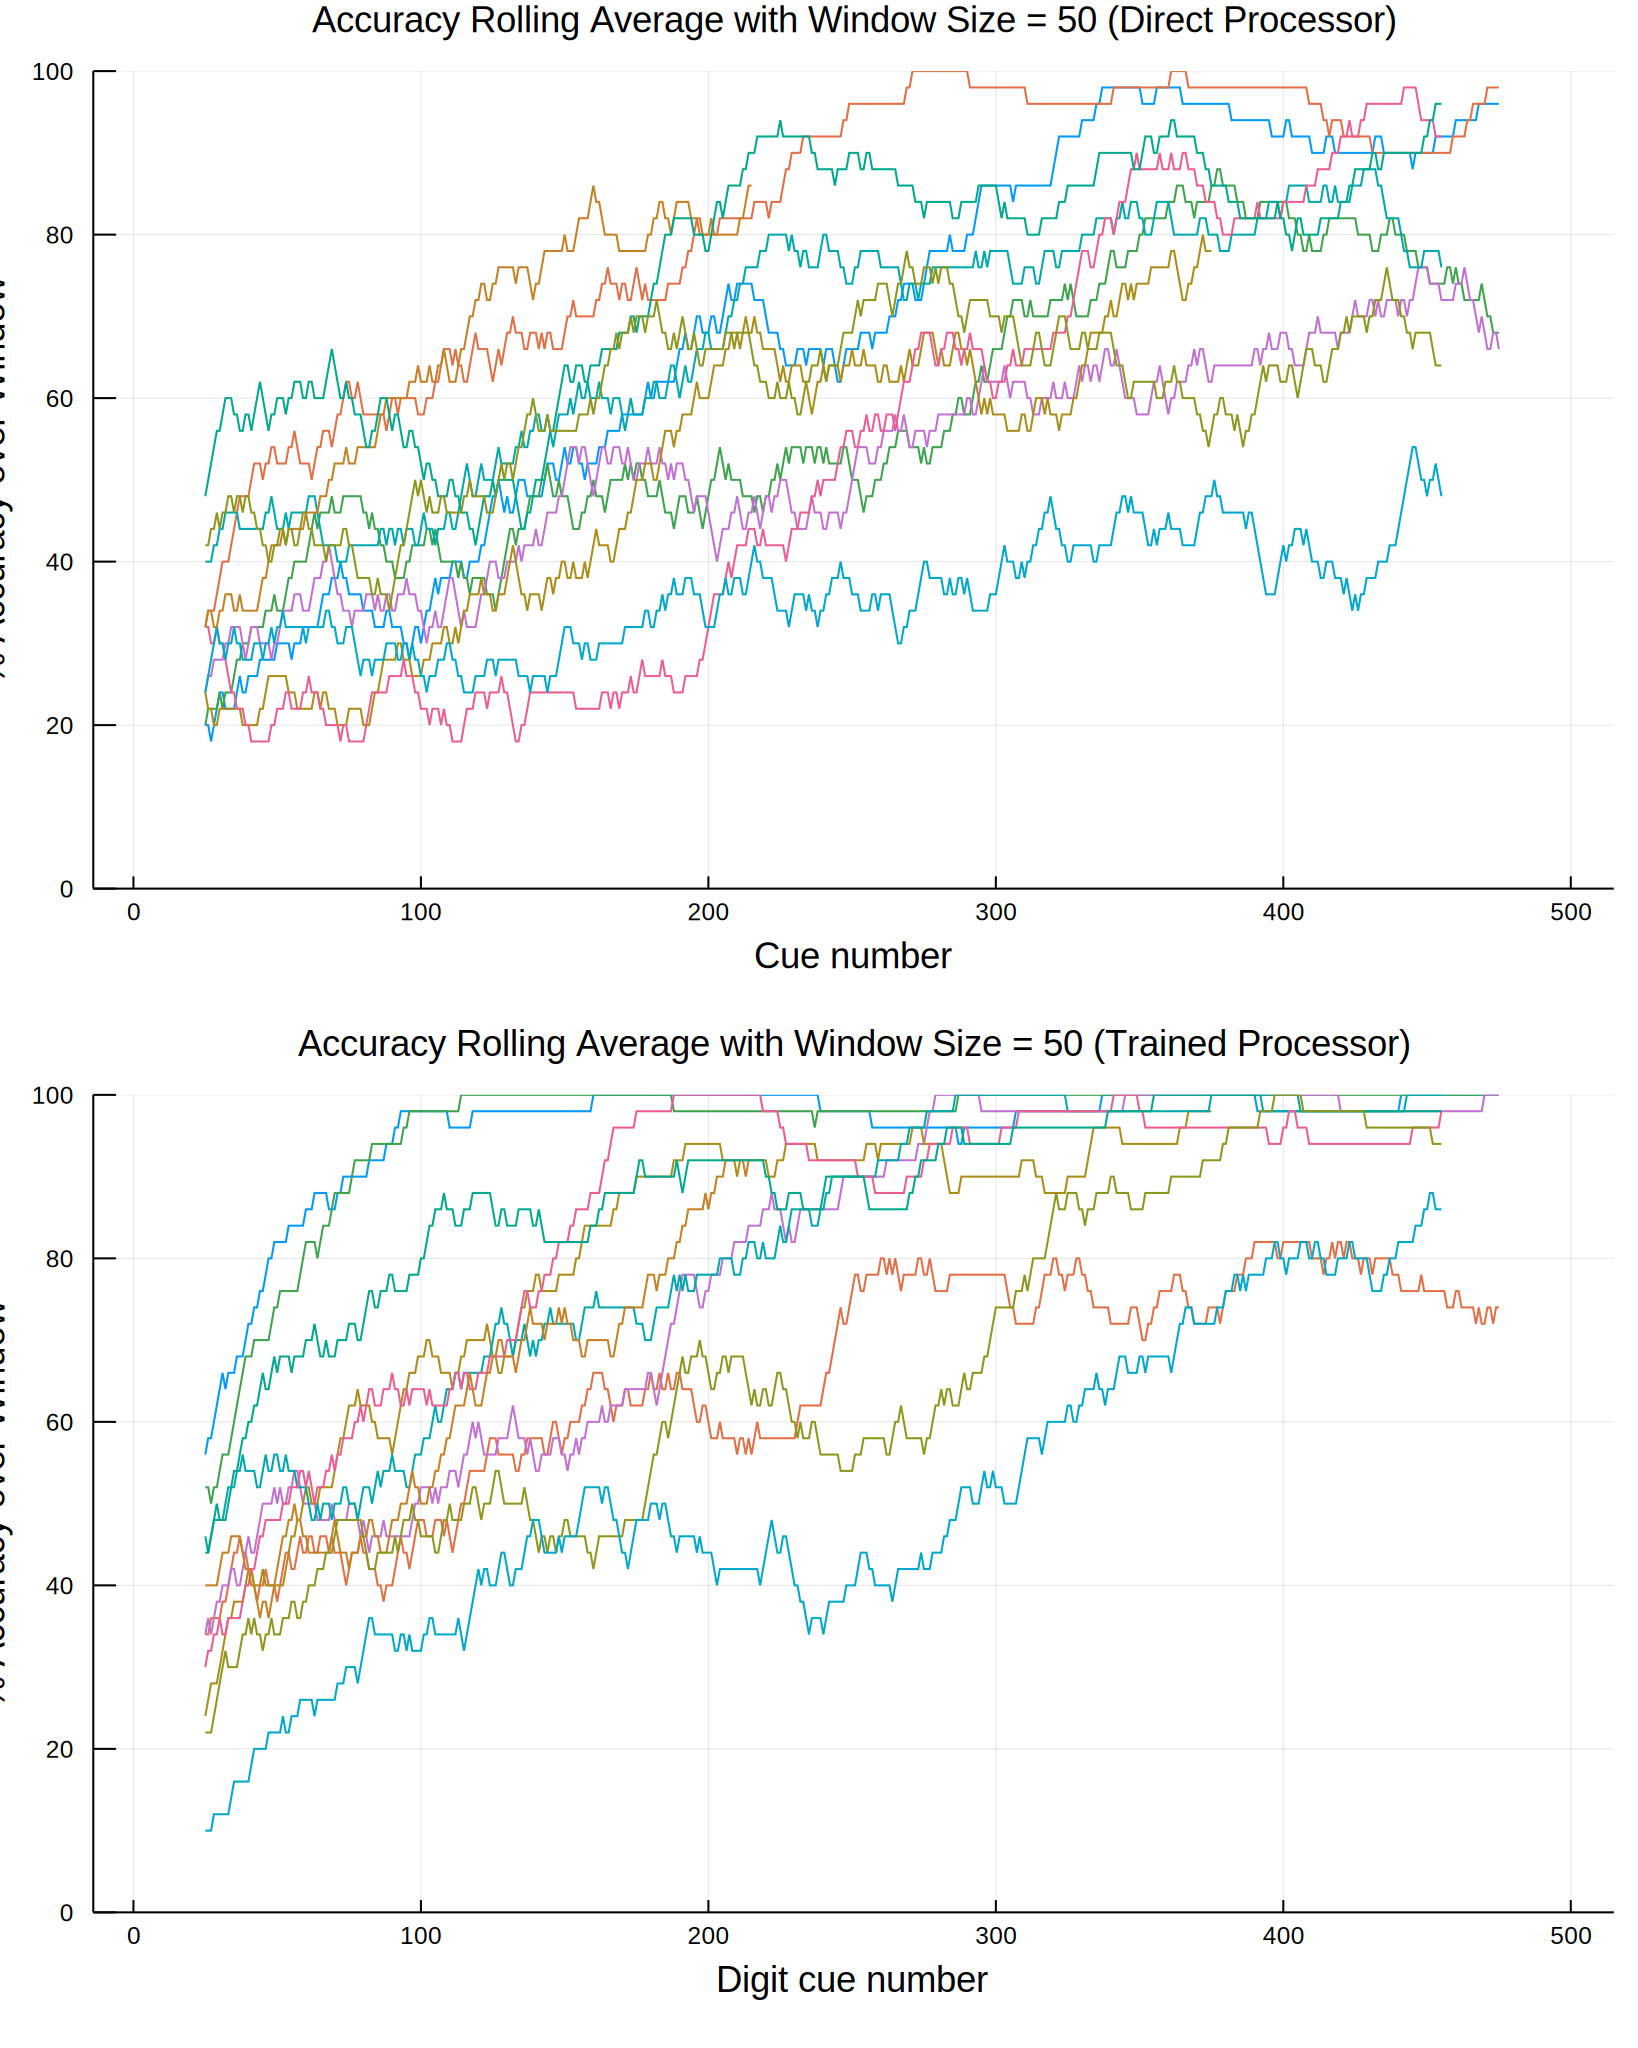

In [36]:
p1 = plot(
    [s[!, :moving_average] for (i, s) in enumerate(subsets) if occursin("Direct", heatmap_labels[i])] * 100,
    label=[label for label in heatmap_labels if occursin("Direct", label)],
    legend=false,
    title="Accuracy Rolling Average with Window Size = $window_size (Direct Processor)",
    titlefontsize=12,
    ylabel="% Accuracy over Window",
    xlabel="Cue number",
    ylims=(0, 100),
    guidefont=font(12),
    dpi=300
)

p2 = plot(
    [s[!, :moving_average] for (i, s) in enumerate(subsets) if occursin("Trained", heatmap_labels[i])] * 100,
    label=[label for label in heatmap_labels if occursin("Trained", label)],
    legend=false,
    title="Accuracy Rolling Average with Window Size = $window_size (Trained Processor)",
    titlefontsize=12,
    ylabel="% Accuracy over Window",
    xlabel="Digit cue number",
    ylims=(0, 100),
    guidefont=font(12),
    dpi=300
)

layout=@layout[a;b]
plot(p1, p2, layout=layout, size=(800, 1000), dpi=300)

In [37]:
savefig("../thesis/images/learning_curves.png")

## Statistical Effects

In [38]:
# Had to Pkg.rm("Atom") because of incompatibility
# Pkg.add("GLM")

In [39]:
using GLM

In [40]:
data

,trial,cue,digit,keypress,cuetime,trialtime,sessiontime,condition,participant
,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,String
1,0,0,8,0,3.56245,6.51641,7.78259,1,P10
2,0,1,2,2,3.10118,9.62042,10.8866,1,P10
3,0,2,9,1,3.72535,13.3485,14.6146,1,P10
4,0,3,2,3,3.59716,16.9484,18.2146,1,P10
5,0,4,8,0,2.62138,19.5725,20.8387,1,P10
6,0,5,1,7,3.04535,22.6205,23.8867,1,P10
7,0,6,4,1,2.65325,25.2764,26.5426,1,P10
8,0,7,0,0,3.12539,28.4044,29.6706,1,P10
9,0,8,5,2,4.99732,33.4044,34.6706,1,P10


In [47]:
minimum(data[!, :cue])

0

In [ ]:
data[!, :progress]  = data[!, :block] * data[!, :trial]

In [41]:
data[!, :digit] = string.(data[!, :digit]);

In [58]:
maximum(data[!, :sessiontime])

2541.1029567000223

In [61]:
log_results = glm(@formula(correct ~ cue * trial * block + condition * trial + participant + digit), data, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

correct ~ 1 + cue + trial + block + condition + participant + digit + cue & trial + cue & block + trial & block + condition & trial + cue & trial & block

Coefficients:
────────────────────────────────────────────────────────────────────────────────────────────
                        Estimate  Std. Error     z value  Pr(>|z|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)          -1.8665      0.221365     -8.43175     <1e-16  -2.30036     -1.43263   
cue                   0.0191421   0.0151403     1.26432     0.2061  -0.0105323    0.0488166 
trial                 0.14909     0.0248545     5.99851     <1e-8    0.100376     0.197804  
block                 0.773713    0.0867461     8.91928     <1e

In [60]:
GLM.co

UndefVarError: UndefVarError: co not defined

In [61]:
coef_names = coefnames(log_results)

28-element Array{String,1}:
 "(Intercept)"        
 "cue"                
 "trial"              
 "block"              
 "condition"          
 "participant: P02"   
 "participant: P03"   
 "participant: P04"   
 "participant: P05"   
 "participant: P06"   
 "participant: P07"   
 "participant: P08"   
 "participant: P09"   
 ⋮                    
 "digit: 2"           
 "digit: 3"           
 "digit: 4"           
 "digit: 5"           
 "digit: 6"           
 "digit: 7"           
 "digit: 8"           
 "digit: 9"           
 "cue & trial"        
 "cue & block"        
 "trial & block"      
 "cue & trial & block"

In [62]:
coeffs = coef(log_results)

28-element Array{Float64,1}:
 -2.081772119197465    
  0.018471898367773756 
  0.17625508862741088  
  0.7587825190321636   
  0.9596243732216151   
 -0.7466885980523941   
 -0.3915729399915082   
 -1.1504238069767558   
 -1.1288982383350443   
 -0.6823109804778852   
 -0.9142664695874511   
 -0.6323930791045599   
 -0.033948200857655056 
  ⋮                    
  0.23333073745346508  
  0.3142683705147296   
  0.6454418013777969   
  0.10515513474100983  
 -0.0685791739627939   
  1.0202573674183948   
  0.27537409254698014  
  0.06577804587186267  
  0.0017408814331991093
  0.0034685395714252774
  0.014075164694247131 
 -0.0022647360437172523

In [63]:
intervals = confint(log_results)

28×2 Array{Float64,2}:
 -2.51346     -1.65008    
 -0.0112839    0.0482277  
  0.128123     0.224387   
  0.588018     0.929547   
  0.859128     1.06012    
 -0.982999    -0.510378   
 -0.635162    -0.147984   
 -1.38238     -0.91847    
 -1.37719     -0.880609   
 -0.928608    -0.436014   
 -1.15879     -0.669744   
 -0.901139    -0.363647   
 -0.292159     0.224262   
  ⋮                       
  0.0225969    0.444065   
  0.103581     0.524956   
  0.42594      0.864944   
 -0.107239     0.317549   
 -0.280759     0.143601   
  0.795137     1.24538    
  0.0606136    0.490135   
 -0.147292     0.278848   
 -0.00215764   0.0056394  
 -0.0110472    0.0179843  
 -0.0118194    0.0399698  
 -0.0044265   -0.000102969

In [64]:
all_results = [[coef_names[i], coeffs[i], intervals[i, :]...] for (i, name) in enumerate(coef_names) 
        if (name in ["condition", "cue", "trial", "block"]) | (occursin("digit", name))]

all_results_array = hcat(all_results...) 

4×13 Array{Any,2}:
   "cue"      "trial"   "block"   "condition"  …   "digit: 8"    "digit: 9"
  0.0184719  0.176255  0.758783  0.959624         0.275374      0.065778   
 -0.0112839  0.128123  0.588018  0.859128         0.0606136    -0.147292   
  0.0482277  0.224387  0.929547  1.06012          0.490135      0.278848   

In [65]:
coeffs = float.(all_results_array[2, :])

13-element Array{Float64,1}:
  0.018471898367773756
  0.17625508862741088 
  0.7587825190321636  
  0.9596243732216151  
  1.7064039417089227  
  0.23333073745346508 
  0.3142683705147296  
  0.6454418013777969  
  0.10515513474100983 
 -0.0685791739627939  
  1.0202573674183948  
  0.27537409254698014 
  0.06577804587186267 

In [66]:
coeff_labels = string.(all_results_array[1, :])

13-element Array{String,1}:
 "cue"      
 "trial"    
 "block"    
 "condition"
 "digit: 1" 
 "digit: 2" 
 "digit: 3" 
 "digit: 4" 
 "digit: 5" 
 "digit: 6" 
 "digit: 7" 
 "digit: 8" 
 "digit: 9" 

In [67]:
coeff_errors = (float.(all_results_array[3:4, :]) |> transpose |> collect) .- coeffs

13×2 Array{Float64,2}:
 -0.0297558  0.0297558
 -0.0481319  0.0481319
 -0.170764   0.170764 
 -0.100496   0.100496 
 -0.249327   0.249327 
 -0.210734   0.210734 
 -0.210688   0.210688 
 -0.219502   0.219502 
 -0.212394   0.212394 
 -0.21218    0.21218  
 -0.22512    0.22512  
 -0.214761   0.214761 
 -0.21307    0.21307  

In [68]:
 using Plots.PlotMeasures

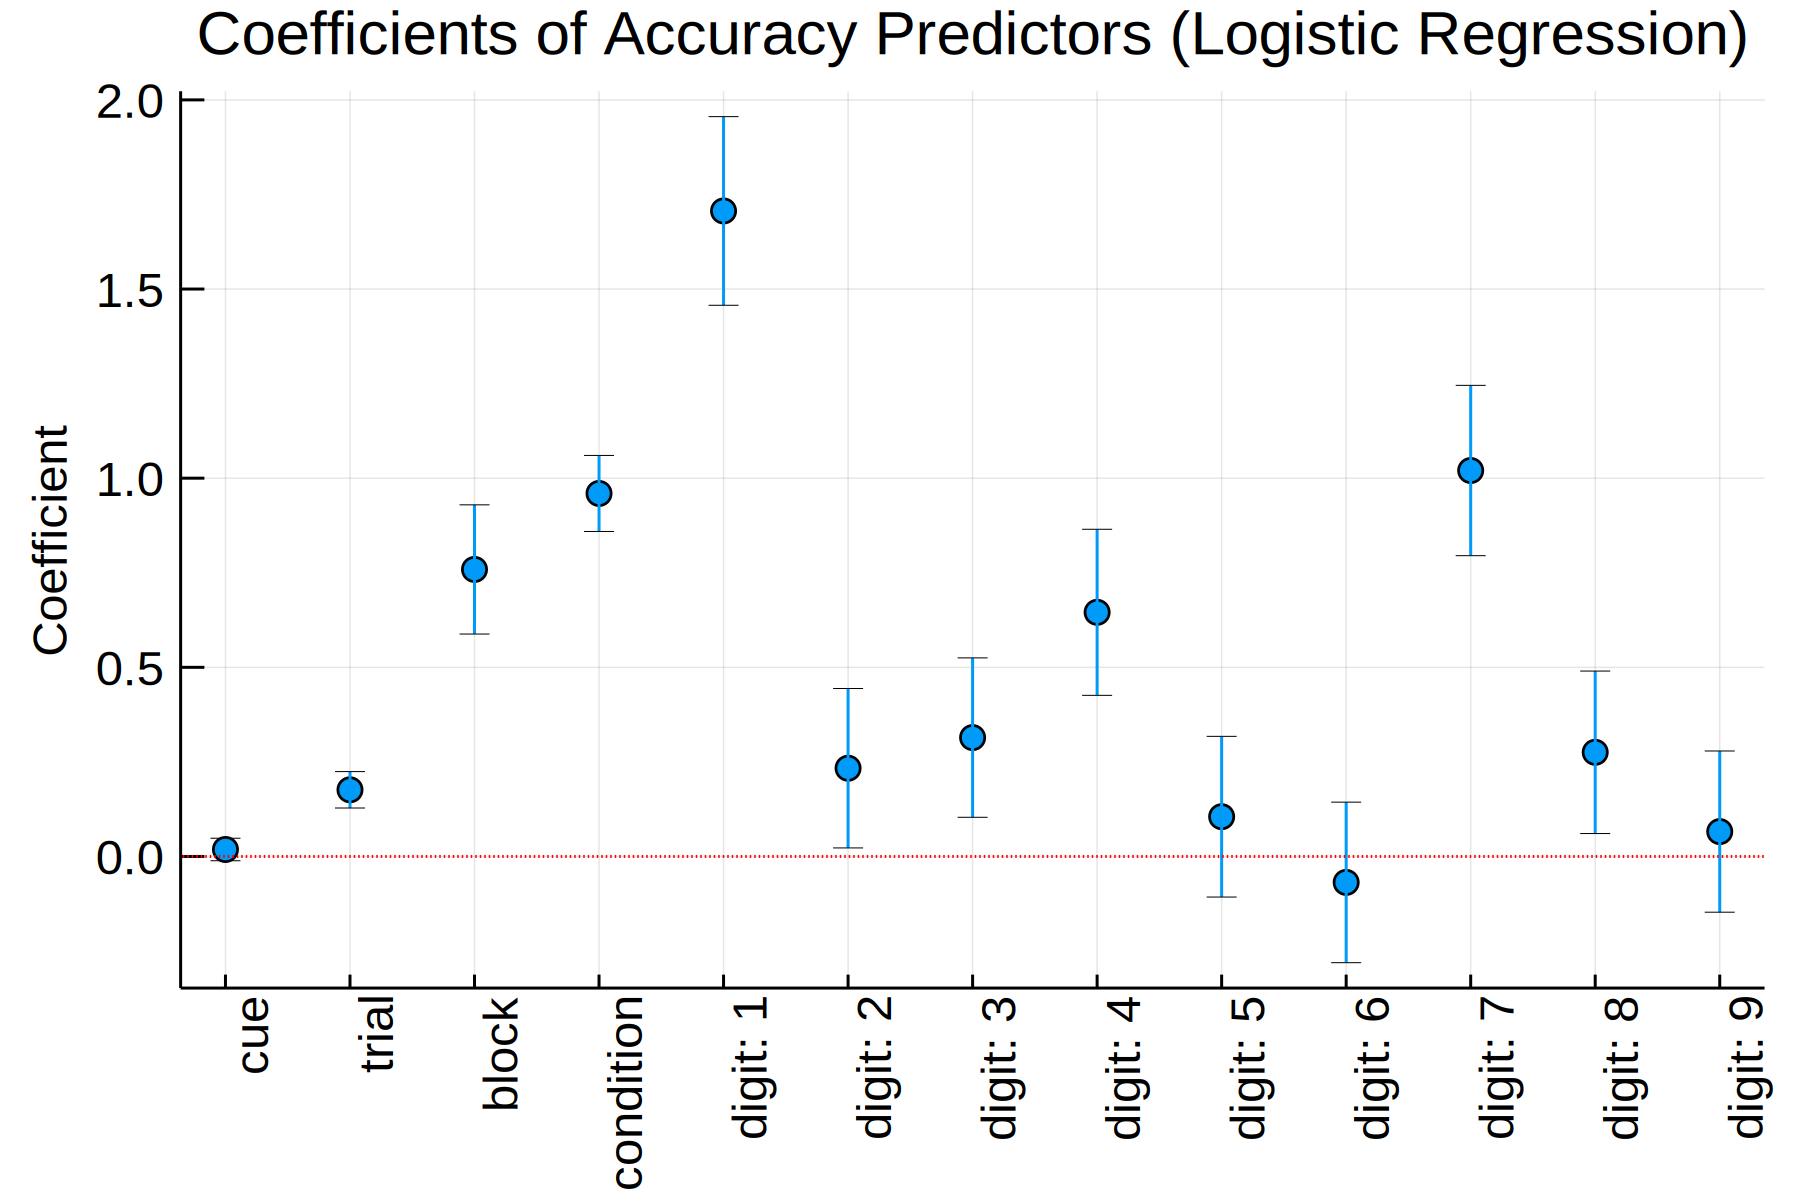

In [69]:
plot(
    coeff_labels,
    coeffs,
    yerror=coeff_errors,
    seriestype=:scatter,
    legend=:none,
    title="Coefficients of Accuracy Predictors (Logistic Regression)",
    xrotation=90,
    bottom_margin=11mm,
    ylabel="Coefficient",
    guidefont=font(11),
    tickfont=font(11),
    dpi=300,
)
hline!(
    [0.0],
    linecolor=:red,
    linestyle=:dot,
)

In [70]:
savefig("../thesis/images/statistical_effects.png")

## No-Feedback Trials

In [34]:
filenames_primer_session = Glob.glob(data_directory * "/p?_p*.csv" ) |> sort;
filenames_primer_config = Glob.glob(data_directory * "/p?_p*.json") |> sort;

In [35]:
data_primer_session = [CSV.read(filename) for filename in filenames_primer_session];
data_primer_config = [JSON.parsefile(filename) for filename in filenames_primer_config];

In [36]:
for (i, primer) in enumerate(data_primer_session)
    
    participant_string = data_primer_config[i]["details"]["participant"]
    (participant, block) = split(participant_string, "_")
    
    primer[!, :participant] .= participant
    primer[!, :correct] = primer[!, :digit] .== primer[!, :keypress]
    
end

In [37]:
data_primer = vcat(data_primer_session...);

In [38]:
mean_accuracy = DataFrames.by(
    data_primer, 
    [:processor, :participant], 
    :correct => mean, 
    sort=true
)

,processor,participant,correct_mean
,String,SubStrin…,Float64
1,control,p5,0.288889
2,control,p6,0.285714
3,control,p7,0.163265
4,control,p8,0.0434783
5,test,p5,0.0181818
6,test,p6,0.293103
7,test,p7,0.0588235
8,test,p8,0.0740741
